# Table of contents:
 * [Part 1](#Introduction-to-Machine-Learning---Part-1)
 * [Part 2](#Introduction-to-Machine-Learning---Part-2)

# Introduction to Machine Learning - Part 1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd
import itertools
import importlib
import mlintro_min as mli

In [2]:
%matplotlib inline

# Simple regression (OLS) model

Range of cannon angle psi to investigate

In [3]:
psi_min=20
psi_max=60

Read pre-generated source of data

In [4]:
ref_df = pd.read_csv('datasets/offline/refdata_100K.csv')
# Get a very small subset of inter-spread data for plotting
ref_df_light = mli.get_ref_light(ref_df, psi_min=psi_min, psi_max=psi_max)

Generate a single dataset of 50 observations

In [5]:
np.random.seed(42)
ds = mli.get_datasets(ref_df, n_datasets=1, sample_size=50, 
                      psi_min=psi_min, psi_max=psi_max)[0]

##### Explore dataset

We are only interested in experimental measures of angle and range, `exp_angle` and `exp_range` respectively

In [6]:
ds

,true_angle,true_range,exp_angle,exp_range
55636,49.50156,73.748791,49.290586,76.708848
44400,41.52400,75.088014,42.412220,75.295328
65098,56.21958,68.648328,57.074914,69.804508
41969,39.79799,74.685302,38.595105,75.658031
41793,39.67303,74.646496,39.682778,74.806822
59123,51.97733,72.281949,52.628698,74.684523
46465,42.99015,75.235254,42.404804,78.694761
19928,24.14888,59.709266,24.658375,57.858609
58580,51.59180,72.542447,52.329337,72.761539
60167,52.71857,71.748129,53.935456,72.957270


### Exercise 
Plot the (experimentally) measured range `exp_range` as a function of the (experimentally) measured angle `exp_angle`, once with matplotlib `plt.scatter()` function, and once with seaborn `sns.scatterplot()` function.  

* HINT 1: look at the functions help to know which function arguments to use
* HINT 2: you can call these functions in two ways:
  * either extract the columns you want to plot and give them as parameters `x` and `y`, OR
  * just provide the column names as arguments for `x` and `y`,  and provide the dataframe name as argument to the parameter `data`. This approach is preferred.
* HINT 3: if using the first method mentioned in HINT 2, remember you can extract a column from a dataframe either as a single column `pandas` object called a `Series` with `[ ]`, or as a `DataFrame` object with `[[ ]]`

In [ ]:
plt.figure(figsize=(8, 4))
#Write plot commands here
plt.ylim([50, 80]);

## Part 1: model selection with train / test split

We will compare three models of different complexity (different number of parameters):
   * Standard linear model (2 parameters: $\beta_0$, $\beta_\psi$)
   * Linear model with the feature squared (3 parameters: $\beta_0$, $\beta_\psi$, $\beta_{\psi^2}$)
   * Linear model with up to $5^{th}$ power of feature (6 parameters: $\beta_0$, $\beta_\psi$, $\beta_{\psi^2}$, $\beta_{\psi^3}$, $\beta_{\psi^4}$, $\beta_{\psi^5}$)

In [8]:
from sklearn.model_selection import train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Let's divide our dataset into training and test set !

In [166]:
X = ds[['exp_angle']]
y = ds[['exp_range']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(f"Number of observations: {len(X_train)} for training and {len(X_test)} for testing")

Number of observations: 30 for training and 20 for testing


In [136]:
# We simply used tuple unpacking
a, b, c = 1, 13, 42
print(f'a={a}, b={b}, c={c}')

a=1, b=13, c=42


In [170]:
y_test

,exp_range
29949,70.009436
28920,68.322204
66264,69.136863
29089,67.969052
61234,70.533402
15021,50.339246
55540,72.590726
65801,68.251995
38528,77.908227
18699,57.115907


### Linear (OLS) model with single feature

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

##### Let's train the model

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Create new estimator object (each model is an object in `sklearn`)

In [175]:
lm = LinearRegression()

In [ ]:
lm.

In [176]:
lm.fit(X_train, y_train)

LinearRegression()

In [180]:
lm?

In [178]:
print(f'beta_psi: {lm.coef_}, beta_0: {lm.intercept_}')

beta_psi: [[0.38340895]], beta_0: [53.14568672]


##### Predict, and compute performance scores

In [183]:
lm.predict([[30], [45], [60]])

array([[64.64795508],
       [70.39908926],
       [76.15022345]])

The training score can provide an idea of best possible performance

In [184]:
# We score the predictions made on the same data we trained on
y_pred = lm.predict(X_train)

R2_train = r2_score(y_train, y_pred)
MSE_train = mean_squared_error(y_train, y_pred)
print(f'lm training performance is R2: {R2_train:0.2f} and MSE: {MSE_train:0.2f}')

lm training performance is R2: 0.47 and MSE: 27.38


`R2` can be obtained directly from the model / estimator object as it is the default for `LinearRegression`

In [185]:
lm.score(X_train, y_train)

0.4733701964386373

Let's save all our models scores to compare models later

In [186]:
train_test_results = []
train_test_results.append({'model': 'lm', 'stage': 'train', 
                           'scorer': 'r2', 'val': R2_train})
train_test_results.append({'model': 'lm', 'stage': 'train', 
                           'scorer': 'MSE', 'val': -MSE_train})

##### Let's test on unseen data and get testing score

See possible scores: https://scikit-learn.org/stable/modules/model_evaluation.html

The testing score can provide an idea of performance for unseen data

### Exercise
Let's use the fitted model to see its performance on unseen data. As above, use the `lm.predict()`, `r2_score()` and `mean_squared_error()` functions, but this time to get the scores on the unseen data `X_test`. The predictions of `X_test` have to be compared with the ground truth data `y_test`.
* HINT 1: copy the relevant code, and replace the training data with the testing data where required
* HINT 2: you should find as performance R2: 0.26 and MSE: 33.05

In [187]:
# We score the predictions made on unseen data

lm testing performance is R2: 0.26 and MSE: 33.05


Again let's save our scores for comparison later

In [21]:
train_test_results.append({'model': 'lm', 'stage': 'test', 
                           'scorer': 'r2', 'val': R2_test})
train_test_results.append({'model': 'lm', 'stage': 'test', 
                           'scorer': 'MSE', 'val': -MSE_test})

### Polynomial degree 2 model (polynomial use feature powers as additional features)

##### Train and get training score of degree 2 polynomial

The polynomial terms are created and then added to a standard `LinearRegression`

In [188]:
from sklearn.preprocessing import PolynomialFeatures

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [193]:
poly_transformer = PolynomialFeatures(degree=2)
lm_deg2 = LinearRegression()

A polynomial model is fitted by first transforming the features and then training a `LinearRegression` on the transformed features

In [198]:
X_train_deg2 = poly_transformer.fit_transform(X_train)

In [25]:
X_train

,exp_angle
60167,53.935456
32960,32.835453
15499,20.848535
65584,56.048000
38506,38.066752
55636,49.290586
66037,57.675603
37656,36.539829
67500,58.784003
59123,52.628698


In [26]:
X_train_deg2

array([[1.00000000e+00, 5.39354559e+01, 2.90903340e+03],
       [1.00000000e+00, 3.28354531e+01, 1.07816698e+03],
       [1.00000000e+00, 2.08485347e+01, 4.34661399e+02],
       [1.00000000e+00, 5.60480002e+01, 3.14137832e+03],
       [1.00000000e+00, 3.80667523e+01, 1.44907763e+03],
       [1.00000000e+00, 4.92905859e+01, 2.42956186e+03],
       [1.00000000e+00, 5.76756034e+01, 3.32647522e+03],
       [1.00000000e+00, 3.65398293e+01, 1.33515913e+03],
       [1.00000000e+00, 5.87840026e+01, 3.45555896e+03],
       [1.00000000e+00, 5.26286977e+01, 2.76977982e+03],
       [1.00000000e+00, 5.52333414e+01, 3.05072201e+03],
       [1.00000000e+00, 2.57757690e+01, 6.64390269e+02],
       [1.00000000e+00, 3.68614775e+01, 1.35876852e+03],
       [1.00000000e+00, 4.24122201e+01, 1.79879641e+03],
       [1.00000000e+00, 2.74364029e+01, 7.52756204e+02],
       [1.00000000e+00, 5.70749141e+01, 3.25754582e+03],
       [1.00000000e+00, 2.75235035e+01, 7.57543245e+02],
       [1.00000000e+00, 2.85425

In [199]:
lm_deg2.fit(X_train_deg2, y_train)

LinearRegression()

In [200]:
lm_deg2.coef_

array([[ 0.        ,  3.34282668, -0.03760496]])

Let's compute training score  
**Warning**: `LinearRegression` needs to be applied to the *transformed* (polynomial) features

In [203]:
y_pred = lm_deg2.predict(X_train_deg2)

R2_train = r2_score(y_train, y_pred)
MSE_train = mean_squared_error(y_train, y_pred)
print(f'poly deg2 training performance is R2: {R2_train:0.2f} and MSE: {MSE_train:0.2f}')

poly deg2 training performance is R2: 0.91 and MSE: 4.42


In [202]:
train_test_results.append({'model': 'lm_deg2', 'stage': 'train', 
                           'scorer': 'r2', 'val': R2_train})
train_test_results.append({'model': 'lm_deg2', 'stage': 'train', 
                           'scorer': 'MSE', 'val': -MSE_train})

##### Let's test on unseen data and get testing score

Again, should not forget to transform the test data to get polynomial features

In [204]:
X_test_deg2 = poly_transformer.fit_transform(X_test) 

y_pred = lm_deg2.predict(X_test_deg2)

R2_test = r2_score(y_test, y_pred)
MSE_test = mean_squared_error(y_test, y_pred)
print(f'poly deg2 testing performance is R2: {R2_test:0.2f} and MSE: {MSE_test:0.2f}')

poly deg2 testing performance is R2: 0.91 and MSE: 4.20


In [205]:
train_test_results.append({'model': 'lm_deg2', 'stage': 'test', 
                           'scorer': 'r2', 'val': R2_test})
train_test_results.append({'model': 'lm_deg2', 'stage': 'test', 
                           'scorer': 'MSE', 'val': -MSE_test})

### Polynomial degree 5 model, introducing pipeline object

It is common to use preprocessing steps such as features transformation. To avoid repeating these processing steps (e.g. when testing the model on new data) the `Pipeline` object is very useful. It builds a workflow which can be called with a single command. 

##### Train and get training score of degree 5 polynomial with *pipeline*

In [207]:
from sklearn.pipeline import Pipeline

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

The creation of the polynomial terms are embed in the `Pipeline` object which represents our new estimator (i.e. the one to use with `fit`, `predict`, etc.)

In [208]:
lm_deg5 = Pipeline([('poly_transformer', PolynomialFeatures(degree=5)),
                    ('lm', LinearRegression())])

Pipeline(steps=[('poly_transformer', PolynomialFeatures(degree=5)),
                ('lm', LinearRegression())])

### Exercise
Train and test your "degree 5"-polynomial model, and get both the training and testing scores (R2 and MSE).  
1. Fit  your pipeline model on `X_train` and `y_train` with the `lm_deg5.fit()` method (you only need to call this method because the pipeline object will take care of calling the required `transform` and `fit` methods of all the pipeline objects)
2. Examine your fitted linear model coefficients. Because your model is a pipeline object including `poly_transformer` and `lm`, you have to look at the specific `lm` object accessible with `lm_deg5['lm']` 
3. Compute the R2 and MSE training score by comparing predictions on `X_train` (you can name them `y_pred`) with the ground truth `y_train`, and save them in the variables `R2_train` and `MSE_train` respectively
4. Run the cell further down below to append the training scores to the `train_test_results` variable
5. Using the fitted model on step 1, now compute the R2 and MSE testing scores by comparing predictions on `X_test` with `y_test`, and save them in the variables `R2_test` and `MSE_test` respectively
6. Run the cell further down below to append the test scores to the `train_test_results` variable

HINT: Copy previous code and adapt it as needed

In [ ]:
# For Step 4
train_test_results.append({'model': 'lm_deg5', 'stage': 'train', 
                           'scorer': 'r2', 'val': R2_train})
train_test_results.append({'model': 'lm_deg5', 'stage': 'train', 
                           'scorer': 'MSE', 'val': -MSE_train})

In [213]:
# For Step 6
train_test_results.append({'model': 'lm_deg5', 'stage': 'test', 
                           'scorer': 'r2', 'val': R2_test})
train_test_results.append({'model': 'lm_deg5', 'stage': 'test', 
                           'scorer': 'MSE', 'val': -MSE_test})

##### Plot all the results

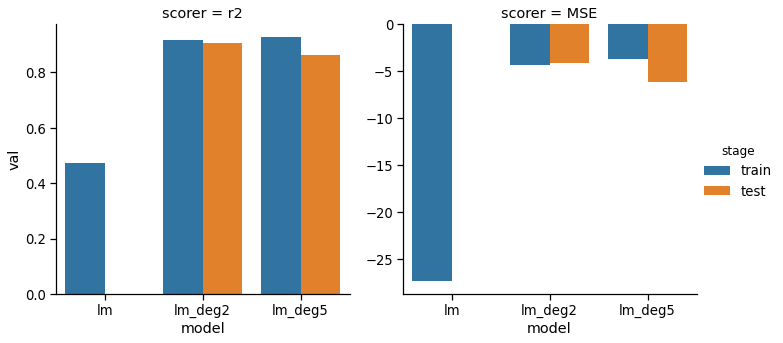

In [218]:
# The list of dictionaries is transformed into a Pandas dataframe
train_test_results_df = pd.DataFrame(train_test_results)
# We extract the r2 score results
r2_results = train_test_results_df.loc[train_test_results_df['scorer'] == 'r2']
# We extract the MSE score results
MSE_results = train_test_results_df.loc[train_test_results_df['scorer'] == 'MSE']
# We call the seaborn `catplot` function which can plot 4 level of informations:
# x [model: lm, lm_deg2, ...], y [score value], colored by `hue` [training or testing score], 
# and producing separate plots for each `col` [score metric: r2 or MSE]
with sns.plotting_context("notebook", font_scale=1.2):
    g = sns.catplot(x="model", y="val", hue="stage", col="scorer", 
                    data=train_test_results_df, kind="bar", sharey=False)

For many other regression models implemented in sklearn, cf https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 

## Part 2: Model selection with cross-validation

https://scikit-learn.org/stable/modules/cross_validation.html

In [219]:
from sklearn.model_selection import KFold

In [220]:
KFold?

Let's see what K fold is actually doing on a 10-observation dataset

In [221]:
X_example = pd.DataFrame({'obs': 
                          np.random.randint(0, 1000, 10)})
X_example

,obs
0,260
1,573
2,511
3,199
4,329
5,996
6,89
7,590
8,54
9,911


In [222]:
kf = KFold(n_splits=5)
for (ix_train, ix_test) in kf.split(X_example):
    print("train ix:", ix_train, "testix:", ix_test)

train ix: [2 3 4 5 6 7 8 9] testix: [0 1]
train ix: [0 1 4 5 6 7 8 9] testix: [2 3]
train ix: [0 1 2 3 6 7 8 9] testix: [4 5]
train ix: [0 1 2 3 4 5 8 9] testix: [6 7]
train ix: [0 1 2 3 4 5 6 7] testix: [8 9]


In [223]:
kfs = KFold(n_splits=5, shuffle=True, random_state=42)
for (ix_train, ix_test) in kfs.split(X_example):
    print("train ix:", ix_train, "test ix:", ix_test)

train ix: [0 2 3 4 5 6 7 9] test ix: [1 8]
train ix: [1 2 3 4 6 7 8 9] test ix: [0 5]
train ix: [0 1 3 4 5 6 8 9] test ix: [2 7]
train ix: [0 1 2 3 5 6 7 8] test ix: [4 9]
train ix: [0 1 2 4 5 7 8 9] test ix: [3 6]


In [224]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Size X: {len(X)}, with X train: {len(X_train)} and X test: {len(X_test)}")

Size X: 50, with X train: 30 and X test: 20


In [225]:
ml_models = {'lm': LinearRegression(),
             'lm_deg2': Pipeline([('poly_transformer', PolynomialFeatures(degree=2)),
                                  ('lm', LinearRegression())]),
             'lm_deg5': Pipeline([('poly_transformer', PolynomialFeatures(degree=5)),
                                  ('lm', LinearRegression())])}

In [226]:
#from sklearn.model_selection import StratifiedKFold

In [229]:
kf_results = []

kfs = KFold(n_splits=10, shuffle=True, random_state=42)
for i_f, (ix_train, ix_test) in enumerate(kfs.split(X_train)):
    # Loop over models
    for mod_name, mod in ml_models.items():
        # Define training and testing folds
        X_training_folds = X_train.iloc[ix_train]
        y_training_folds = y_train.iloc[ix_train]
        X_test_fold = X_train.iloc[ix_test]
        y_test_fold = y_train.iloc[ix_test]
        # Fit the model on the training folds
        mod.fit(X_training_folds, y_training_folds)
        # Test on both the training and testing folds to check for over-/under-fitting
        y_pred_train = mod.predict(X_training_folds)
        y_pred_test = mod.predict(X_test_fold)
        # R2
        kf_results.append({'model': mod_name, 'fold': i_f, 'stage': 'train', 'scorer': 'r2', 
                           'val': r2_score(y_training_folds, y_pred_train)})
        kf_results.append({'model': mod_name, 'fold': i_f, 'stage': 'test', 'scorer': 'r2', 
                           'val': r2_score(y_test_fold, y_pred_test)})
        # MSE
        kf_results.append({'model': mod_name, 'fold': i_f, 'stage': 'train', 'scorer': 'MSE', 
                           'val': -mean_squared_error(y_training_folds, y_pred_train)})
        kf_results.append({'model': mod_name, 'fold': i_f, 'stage': 'test', 'scorer': 'MSE', 
                           'val': -mean_squared_error(y_test_fold, y_pred_test)})
kf_results_df = pd.DataFrame(kf_results)

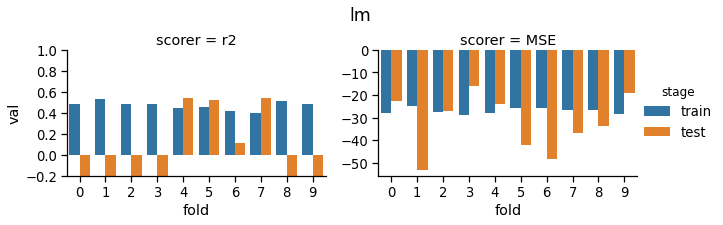

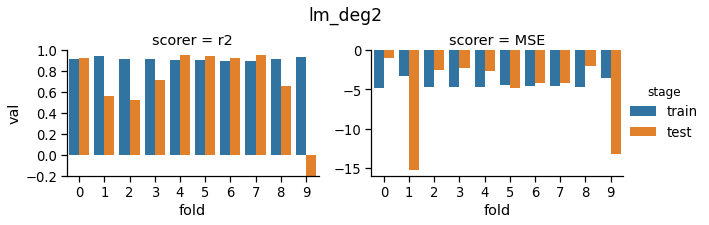

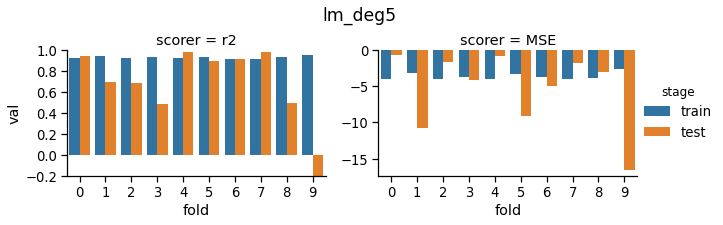

In [230]:
for mod_name in ml_models.keys():
    kf_df = kf_results_df.loc[kf_results_df['model'] == mod_name]
    with sns.plotting_context("notebook", font_scale=1.2):
        g = sns.catplot(x="fold", y="val", hue="stage", col="scorer", data=kf_df, 
                        kind="bar", sharey=False, height=3, aspect=1.5)
        g.axes[0,0].set_ylim(-0.2,1)
        #g.axes[0,1].set_ylim(0, 45)
        g.fig.suptitle(mod_name, y=1.05)

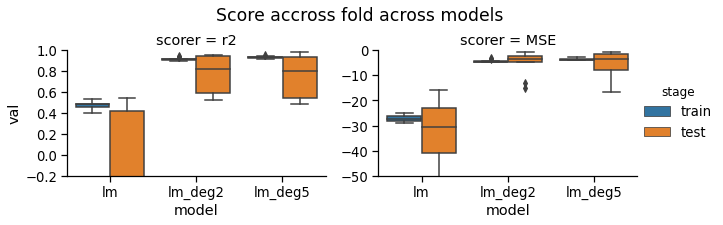

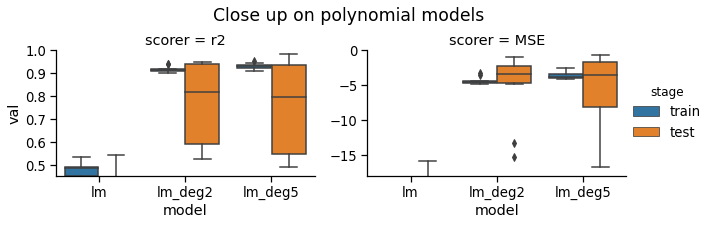

In [231]:
with sns.plotting_context("notebook", font_scale=1.2):
    g = sns.catplot(x="model", y="val", hue="stage", col="scorer", data=kf_results_df, 
                    kind="box", sharey=False, height=3, aspect=1.5)
    g.axes[0, 0].set_ylim(-0.2, 1)
    g.axes[0, 1].set_ylim(-50, 0)
    g.fig.suptitle("Score accross fold across models", y=1.05)
    g = sns.catplot(x="model", y="val", hue="stage", col="scorer", data=kf_results_df, 
                    kind="box", sharey=False, height=3, aspect=1.5)
    g.axes[0, 0].set_ylim(0.45, 1)
    g.axes[0, 1].set_ylim(-18, 0)
    g.fig.suptitle("Close up on polynomial models", y=1.05)

#### `sklearn` helps to automate common operations 

In [232]:
from sklearn.model_selection import cross_val_score

In [236]:
cross_val_score?

In [237]:
from sklearn.metrics import fbeta_score, make_scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [238]:
ml_models = {'lm': LinearRegression(),
             'lm_deg2': Pipeline([('poly_transformer', PolynomialFeatures(degree=2)),
                                  ('lm', LinearRegression())]),
             'lm_deg5': Pipeline([('poly_transformer', PolynomialFeatures(degree=5)),
                                  ('lm', LinearRegression())])}
# Get cv train AND test scores
cv_test_scores = {}
for mod_name in ml_models.keys():
    cv_test_scores[mod_name] = cross_val_score(ml_models[mod_name], X_train, y_train, 
                                               cv=kfs, scoring=mse_scorer, n_jobs=-1)
cv_test_scores_df = pd.DataFrame(cv_test_scores)

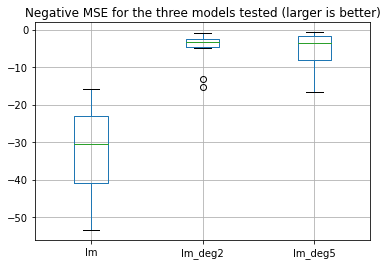

In [239]:
cv_test_scores_df.boxplot()
plt.title('Negative MSE for the three models tested (larger is better)');

##### Want even more with even less code?

In [240]:
from sklearn.model_selection import cross_validate

`cross_validate` returns train *and* test scores on *several* metrics

In [241]:
cross_validate?

In [243]:
ml_models = {'lm': LinearRegression(),
             'lm_deg2': Pipeline([('poly_transformer', PolynomialFeatures(degree=2)),
                                  ('lm', LinearRegression())]),
             'lm_deg5': Pipeline([('poly_transformer', PolynomialFeatures(degree=5)),
                                  ('lm', LinearRegression())])}
# Get cv train AND test scores
cv_scores = {}
for mod_name in ml_models.keys():
    cv_scores[mod_name] = cross_validate(ml_models[mod_name], X_train, y_train, cv=kfs, 
                                         scoring=['r2', 'neg_mean_squared_error'], 
                                         return_train_score=True, n_jobs=-1)

In [244]:
def crossval_to_df(cv_dict):
    crossval_results = []
    for model in cv_dict.keys():
        for scorer in cv_dict[model].keys():
            if scorer.startswith('train_'):
                score = scorer.replace('train_', '')
                for i_val, val in enumerate(cv_dict[model][scorer]):
                    crossval_results.append({'model': model, 'fold': i_val, 'stage': 'train', 
                                             'scorer': score, 'val': val})
            elif scorer.startswith('test_'):
                score = scorer.replace('test_', '')
                for i_val, val in enumerate(cv_dict[model][scorer]):
                    crossval_results.append({'model': model, 'fold': i_val, 'stage': 'test', 
                                             'scorer': score, 'val': val})
    return pd.DataFrame(crossval_results)

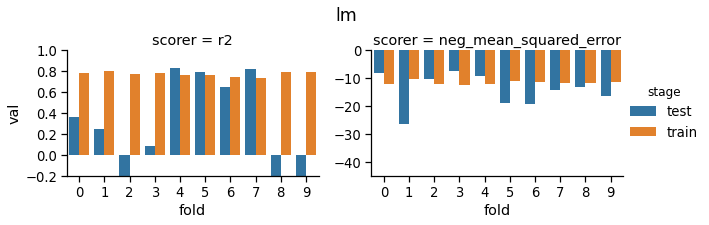

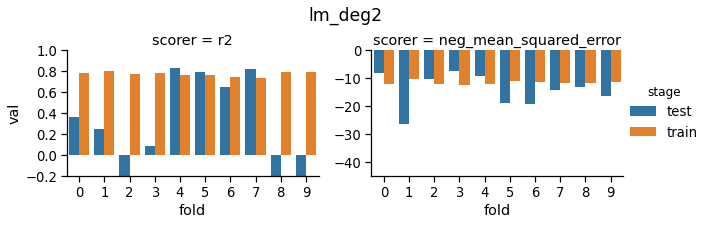

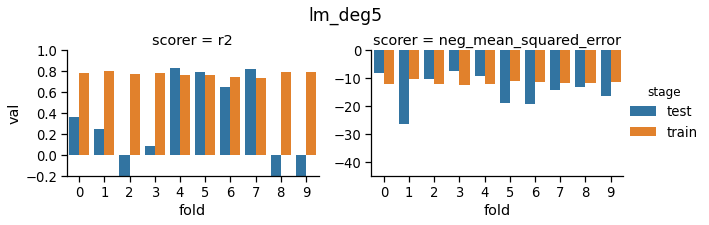

In [245]:
crossval_df = crossval_to_df(cv_scores)
for mod_name in crossval_df['model'].unique():
    kf_df = crossval_df.loc[crossval_df['model'] == mod_name]
    with sns.plotting_context("notebook", font_scale=1.2):
        g = sns.catplot(x="fold", y="val", hue="stage", col="scorer", data=crossval_df,
                        kind="bar", sharey=False, height=3, aspect=1.5, ci=None)
        g.axes[0,0].set_ylim(-0.2,1)
        g.axes[0,1].set_ylim(-45, 0)
        g.fig.suptitle(mod_name, y=1.05)

# Introduction to Machine Learning - Part 2

In [148]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
%matplotlib inline

## Classification: data preprocessing example

### Step 1 : look at the data

In [151]:
stroke_df = pd.read_csv('stroke_dataset.csv')
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4417,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
4418,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4419,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4420,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Continuous values

In [152]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4422.000000,4422.000000,4422.000000,4422.000000,4422.000000,4237.000000,4422.000000
mean,36629.658978,48.883311,0.112619,0.062189,107.964340,30.297144,0.055857
std,21186.264187,18.706121,0.316162,0.241526,47.269234,7.335436,0.229671
min,67.000000,7.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,17994.500000,34.000000,0.000000,0.000000,77.442500,25.200000,0.000000
50%,37130.000000,49.000000,0.000000,0.000000,92.145000,29.100000,0.000000
75%,54806.500000,63.000000,0.000000,0.000000,115.852500,34.000000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Categorical values

In [153]:
stroke_df["hypertension"].value_counts()

0    3924
1     498
Name: hypertension, dtype: int64

In [154]:
cat_columns = ["hypertension", "heart_disease", "ever_married", "work_type",
               "Residence_type", "stroke", "smoking_status"]
for cat in cat_columns:
    print(f"=== Category {cat}")
    print(stroke_df[cat].value_counts())

=== Category hypertension
0    3924
1     498
Name: hypertension, dtype: int64
=== Category heart_disease
0    4147
1     275
Name: heart_disease, dtype: int64
=== Category ever_married
Yes    3353
No     1069
Name: ever_married, dtype: int64
=== Category work_type
Private          2924
Self-employed     819
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
=== Category Residence_type
Urban    2249
Rural    2173
Name: Residence_type, dtype: int64
=== Category stroke
0    4175
1     247
Name: stroke, dtype: int64
=== Category smoking_status
never smoked       1838
Unknown             926
formerly smoked     871
smokes              787
Name: smoking_status, dtype: int64


#### Missing values

In [155]:
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  185
smoking_status         0
stroke                 0
dtype: int64

### Step 2: clean the data

#### Data imputation 1: replace missing categorical data 

In [156]:
stroke_df["smoking_status"].value_counts()

never smoked       1838
Unknown             926
formerly smoked     871
smokes              787
Name: smoking_status, dtype: int64

In [157]:
# We take the labels of the rows (.index), and select the first value (i.e. 0 in Python)
most_frequent_smoking_status = stroke_df["smoking_status"].value_counts().index[0]
most_frequent_smoking_status

'never smoked'

In [158]:
stroke_cleanstep1_df = stroke_df.copy()

In [159]:
unknown_smoking_mask = stroke_cleanstep1_df["smoking_status"]=="Unknown"
stroke_cleanstep1_df.loc[unknown_smoking_mask, "smoking_status"] = most_frequent_smoking_status

In [160]:
stroke_cleanstep1_df["smoking_status"].value_counts()

never smoked       2764
formerly smoked     871
smokes              787
Name: smoking_status, dtype: int64

#### Data imputation 2: replace missing continuous data 

### Exercise 
Replace the missing bmi index with what you think could be an adequate replacement. Check that there are no longer any missing values. 

*TIP1*: copy `stroke_cleanstep1_df` as `stroke_cleanstep2_df`

*TIP2*: create a mask by calling the `.isna` method on the appropriate dateframe column

*TIP3*: relying on the previous mask and the appropriate column name, replace all nan values with the mean or media (using the `.mean` or `.median` method applied to the appropriate column

*TIP4*: to check there are no longer any missing values, use `isna` and `sum` functions chain one after the other

### Step 3: transform the data to expected numerical feature matrix X and label array y

#### Extract the label array

Note use `sklearn` [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) if the label is not yet in numerical form

In [165]:
#from sklearn import preprocessing
#label_to_num = preprocessing.LabelEncoder()
#y = label_to_num.fit_transform(y_label)

In [166]:
y = stroke_cleanstep2_df["stroke"]

#### Drop unnecessary columns

In [167]:
# The drop applies to columns (hence axis=1)
X = stroke_cleanstep2_df.drop(["id", "stroke"], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
4417,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked
4418,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
4419,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
4420,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


#### Apply required transforms
* Ordered categories (i.e. ordinal) are transformed into sequential numbers
* Non ordered categorical data are converted into dummy variables (one hot encoding)
* Continuous variables are scaled (centered on their mean and scaled to unit variance)

In [168]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [169]:
from sklearn.compose import make_column_transformer

In [170]:
# This is only required while waiting for next version of sklearn
OrdinalEncoder.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

In [171]:
cols_ordinal = ["smoking_status"]
cols_non_ordinal = ["gender", "ever_married", "work_type", "Residence_type"]
cols_continuous = ["age", "avg_glucose_level", "bmi"]
preprocessor = make_column_transformer(
    (OrdinalEncoder(categories=[['never smoked', 'formerly smoked', 'smokes']]), cols_ordinal),
    (OneHotEncoder(drop='if_binary', sparse=False), cols_non_ordinal),
    (StandardScaler(), cols_continuous),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [172]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
4417,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked
4418,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
4419,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
4420,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [173]:
X_final = pd.DataFrame(data=preprocessor.fit_transform(X),
                       columns=preprocessor.get_feature_names_out())
X_final

,smoking_status,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,age,avg_glucose_level,bmi,hypertension,heart_disease
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.968599,2.554290,0.884379,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.647813,1.994031,-0.159680,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.663638,-0.043254,0.313627,0.0,1.0
3,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.006239,1.338562,0.578122,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.610173,1.399708,-0.869639,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.663638,-0.512322,-0.159680,1.0,0.0
4418,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.717102,0.364669,1.357685,0.0,0.0
4419,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.742264,-0.528402,0.049132,0.0,0.0
4420,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.113168,1.234043,-0.646907,0.0,0.0


## Classification: model training and testing example

### Consider wine dataset to predict a good/bad quality label according to various features

In [183]:
wine_df = pd.read_csv('wine.csv')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


#### Extract labels as vector y_label

In [218]:
y_label = wine_df["quality"]
y_label

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality, Length: 1599, dtype: object

#### Extract the features as matrix X

In [219]:
X = wine_df.drop("quality", axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Implement basic machine learning workflow with a linear model

### Exercise 
1. Convert the string categorical label `y_label` (`good`, `bad`) into numeric data

*TIP*: use the `fit_transform` method of an instance of  `LabelEncode` applied to `y_label`

2. Split the data into a training (70% of data) and testing (30% data) sets (`X_train, X_test, y_train, y_test`), using stratification

*TIP*: use the `train_test_split` function applied to `X` and `y`
    
3. Fit a logistic regression model on the training data to estimate the model parameters

*TIP*: use the `fit` method of an instance of `LogisticRegression` called with no `penalty` terms and balanced class weight

4. Predict the labels and compare the predictions with the ground truth to obtain the performance as a confusion matrix

*TIP*: use the `predict` method of your instance of `LogisticRegression` and use the `confusion_matrix` function to compare your results `y_train_pred` with the ground truth `y_train`



#### 1. Convert `string` label (`good`, `bad`) into numeric data

In [220]:
from sklearn.preprocessing import LabelEncoder

In [222]:
y = 

array([0, 0, 0, ..., 1, 0, 1])

#### 2. Split the data into a training (70% of data) and testing (30% data) sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(f"Original feature matrix X has {X.shape[0]} observations and {X.shape[1]} features")
print(f"Training feature matrix X has {X_train.shape[0]} observations and {X_train.shape[1]} features")
print(f"Testing feature matrix X has {X_test.shape[0]} observations and {X_test.shape[1]} features")

In [ ]:
print(f"Original label vector y has {y.shape[0]} labels")
print(f"Training label vector y has {y_train.shape[0]} labels")
print(f"Testing label vector y has {y_test.shape[0]} labels")

#### 3. Fit the model on the training data to estimate the model parameters

In [ ]:
from sklearn.linear_model import LogisticRegression

#### 4. Predict the label and compare the predictions with the ground truth to obtain a performance score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

##### Performance on training

In [ ]:
y_pred_train = lr.predict(X_train)

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train, display_labels=label_to_num.classes_);

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train, display_labels=label_to_num.classes_,
                                      normalize='true');

In [ ]:
accuracy_score(y_train, y_pred_train)

##### Performance on testing

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, display_labels=label_to_num.classes_,
                                      normalize='true');

In [ ]:
y_pred_test = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test)

In [ ]:
lr.coef_[0]

In [ ]:
lm_coefs_df = pd.DataFrame({'coefs': np.std(X_train, 0)*lr.coef_[0]},
                           index=X.columns)
plt.figure(figsize=(6,6))
sns.barplot(x='coefs', y=lm_coefs_df.index, data=lm_coefs_df);

### Make the workflow a bit more interesting

1. Convert `string` label (`good`, `bad`) into numeric data  
2. Split the data into a training set (90% of data) and **an hold out testing (10% data) for final evaluation**
3. **Iterate on the training data split into folds**, leaving one fold out for testing, and combining remaining fold for training
4. **At each iteration** fit a model on the training data to estimate the model parameters 
5. Predict the label (wine quality) of the test data **in the left out fold**
6. Compare the predictions with the ground truth to obtain a performance score **in the left out fold**
7. Fit the model on the whole training data, and test it on the hold out test set

In [ ]:
train_test_split?

#### Split the data into a training set (90% of data) and **an hold out testing (10% data) for final evaluation**

In [223]:
from sklearn.model_selection import train_test_split, StratifiedKFold
X_cv, X_final_test, y_cv, y_final_test = train_test_split(X, y, test_size=0.1, 
                                                          stratify=y, random_state=42)

#### Iterate on the training data split into folds

In [224]:
n_folds = 10
# Save accuracy performance
accuracy_perf = {'train': np.zeros(n_folds),
                 'test': np.zeros(n_folds)}
# Save model parameters at each iteration
lr_params = np.zeros((n_folds, len(X_cv.columns)))
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
# Iterate over each set of folds
for i_fold, (train_ix, test_ix) in enumerate(skf.split(X_cv, y_cv)):
    # test_ix is for our left out fold, and train_ix is from combining all other folds
    X_train, y_train = X_cv.iloc[train_ix], y_cv[train_ix]
    X_test, y_test = X_cv.iloc[test_ix], y_cv[test_ix]
    lr = LogisticRegression(penalty='none', max_iter=10000, class_weight='balanced')
    lr.fit(X_train, y_train)
    # Get performance on training and test set (test set = left out fold)
    accuracy_perf['train'][i_fold] = accuracy_score(y_train, lr.predict(X_train))
    accuracy_perf['test'][i_fold] = accuracy_score(y_test, lr.predict(X_test))
    # Get model parameters
    lr_params[i_fold, :] = np.std(X_train, 0)*lr.coef_[0]

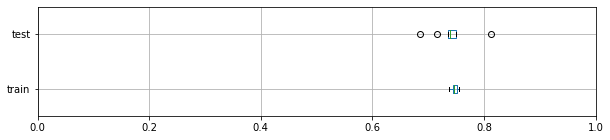

In [225]:
plt.figure(figsize=(10, 2))
pd.DataFrame(accuracy_perf).boxplot(vert=False);
plt.xlim(0, 1);

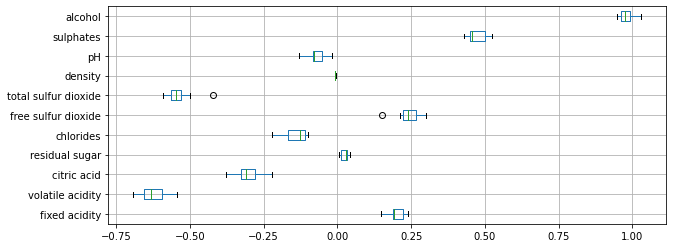

In [226]:
plt.figure(figsize=(10, 4))
pd.DataFrame(lr_params, columns=X_cv.columns).boxplot(vert=False);

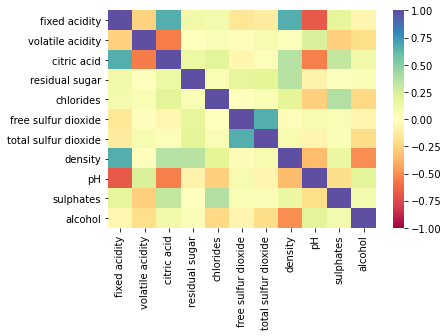

In [227]:
sns.heatmap(X.corr(), cmap="Spectral", vmin=-1, vmax=1);

#### Fit the model on the whole training data, and test it on the hold out test set

In [228]:
lr = LogisticRegression(penalty='none', max_iter=10000, class_weight='balanced')
lr.fit(X_cv, y_cv)
print(f"Training accuracy: {accuracy_score(y_cv, lr.predict(X_cv))}")
print(f"Hold out dataset test accuracy: {accuracy_score(y_final_test, lr.predict(X_final_test))}")

Training accuracy: 0.744266851980542
Hold out dataset test accuracy: 0.76875


### Make the workflow even more interesting

1. Convert `string` label (`good`, `bad`) into numeric data
2. **Add interaction terms to prevent under-fitting**
3. Split the data into a training set (90% of data) and an hold out testing (10% data) for final evaluation
4. Iterate on data split into folds, leaving one fold out for testing, and combining remaining fold for training
5. At each iteration use a logistic regression **with ridge penalty (i.e. l2 norm) and optimize the regularization hyper-parameter `C`**:
    1. **Standardize the features**
    2. **Create an inner cross-validation loop to find the best `C`**
    **BONUS: use a `Pipeline` object**
6. Predict the label (wine quality) of the test data in the left out fold
7. Compare the predictions with the ground truth to obtain a performance score in the left out fold

#### Add interaction terms to prevent under-fitting

In [229]:
from sklearn.preprocessing import PolynomialFeatures

In [230]:
add_interactions = PolynomialFeatures(interaction_only=True, include_bias=False)
X_ir = add_interactions.fit_transform(X)

#### Split the data into a training set (90% of data) and **an hold out testing (10% data) for final evaluation**

In [231]:
from sklearn.model_selection import train_test_split
X_ir_cv, X_ir_final_test, y_cv, y_final_test = train_test_split(X_ir, y, test_size=0.1, 
                                                          stratify=y, random_state=42)

#### At each iteration use a logistic regression with ridge penalty (i.e. l2 norm) and optimize the regularization hyper-parameter `C`

In [232]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

##### The following cell will take a very long time to run, don't run as is if you do not have the required computer power. Instead change the grid search to have only a very small parameter search space

In [233]:
# Note: better to update with column transformer
#     preprocessor = make_column_transformer(
#         (StandardScaler(), num_cols_to_scale),
#          remainder='passthrough'
#     )
#     # Defining pipeline with both processing and model fitting
#     lm_pipeline = make_pipeline(
#         preprocessor,
#         LogisticRegression()

In [234]:
n_cpus=12
n_folds = 10
# Save accuracy performance and hyper parameter values selected in inner CV
accuracy_perf = {'train': np.zeros(n_folds),
                 'test': np.zeros(n_folds)}
best_hyperparams = {'C': [],
                    'l1_ratio': []}
# Save model parameters at each iteration
lr_params = []
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
# Iterate over each set of folds
for i_fold, (train_ix, test_ix) in enumerate(skf.split(X_ir_cv, y_cv)):
    # test_ix is for our left out fold, and train_ix is from combining all other folds
    X_ir_train, X_ir_test = X_ir_cv[train_ix], X_ir_cv[test_ix]
    y_train, y_test = y_cv[train_ix], y_cv[test_ix]
    # Define pipeline adding scaling step before logistic regression model fitting
    lr_pipeline = Pipeline(
        [('scaler', StandardScaler()),
         ('lr', LogisticRegression(penalty='elasticnet', solver='saga',
                                   max_iter=10000, class_weight='balanced'))]
    )
    # Define the grid search using the previously given names with "dudder" __
    grid_search = GridSearchCV(lr_pipeline, n_jobs=n_cpus,
                               param_grid={'lr__C': [0.1, 0.5, 1.0, 5.0, 10, 50, 100],
                                           'lr__l1_ratio': np.linspace(0, 1, 11)})
    # Fit as before, but use the grid search object
    grid_search.fit(X_ir_train, y_train)
    # Get performance on training and test set (test set = left out fold)
    best_hyperparams['C'].append(grid_search.best_params_['lr__C'])
    best_hyperparams['l1_ratio'].append(grid_search.best_params_['lr__l1_ratio'])
    best_lr = grid_search.best_estimator_
    accuracy_perf['train'][i_fold] = accuracy_score(y_train, best_lr.predict(X_ir_train))
    accuracy_perf['test'][i_fold] = accuracy_score(y_test, best_lr.predict(X_ir_test))
    # Get model parameters
    lr_params.append(best_lr['lr'].coef_[0])
lr_params_df = pd.DataFrame(lr_params, columns=add_interactions.get_feature_names_out(X.columns))

In [235]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [236]:
best_hyperparams

{'C': [0.5, 0.1, 10, 100, 5.0, 1.0, 0.5, 0.1, 5.0, 1.0],
 'l1_ratio': [0.8,
  0.5,
  0.2,
  0.0,
  0.0,
  0.9,
  1.0,
  0.2,
  0.30000000000000004,
  0.1]}

In [237]:
accuracy_perf

{'train': array([0.76138996, 0.74440154, 0.77374517, 0.76833977, 0.76756757,
        0.75907336, 0.75057915, 0.74826255, 0.76679537, 0.77623457]),
 'test': array([0.73611111, 0.75      , 0.72222222, 0.74305556, 0.75694444,
        0.75      , 0.83333333, 0.75      , 0.72916667, 0.68531469])}

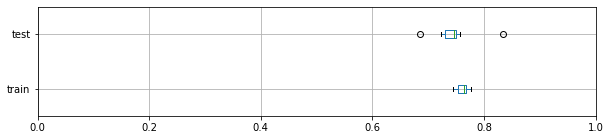

In [238]:
plt.figure(figsize=(10, 2))
pd.DataFrame(accuracy_perf).boxplot(vert=False);
plt.xlim(0, 1);

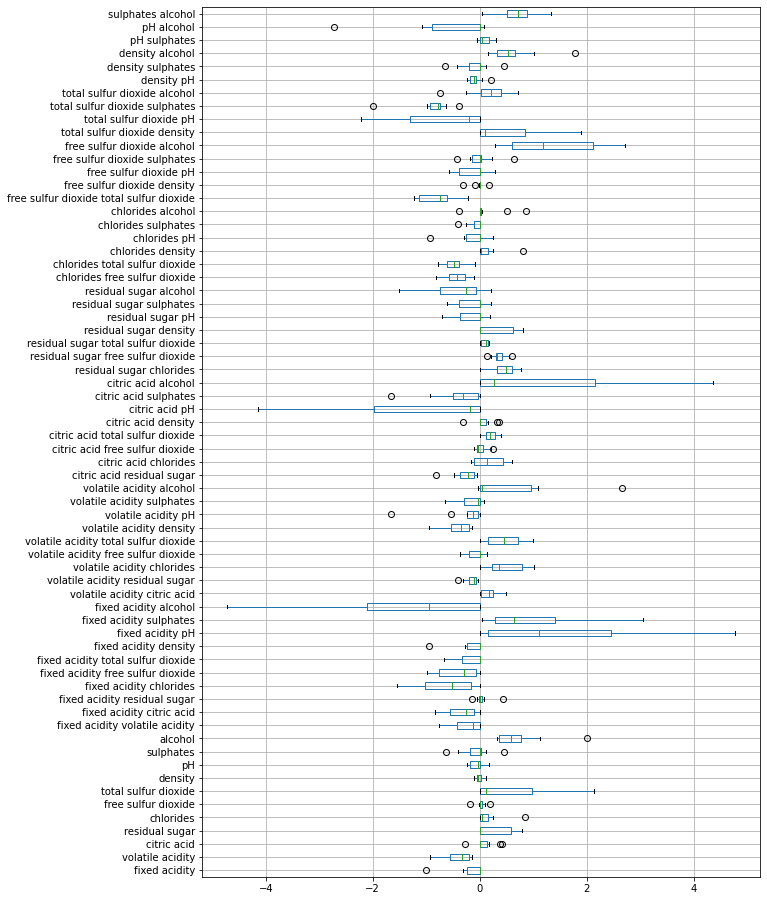

In [239]:
plt.figure(figsize=(10, 16))
lr_params_df.boxplot(vert=False);

#### Fit the model on the whole training data, and test it on the hold out test set

In [240]:
lr_pipeline = Pipeline(
    [('scaler', StandardScaler()),
     ('lr', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000,
                               C=1, l1_ratio=0.1, class_weight='balanced'))]
)
lr_pipeline.fit(X_ir_cv, y_cv)
print(f"Training accuracy: {accuracy_score(y_cv, lr_pipeline.predict(X_ir_cv))}")
print(f"Hold out dataset test accuracy: {accuracy_score(y_final_test, lr_pipeline.predict(X_ir_final_test))}")

Training accuracy: 0.7671994440583739
Hold out dataset test accuracy: 0.7375


## Dimensionality reduction with PCA

In [174]:
from sklearn.datasets import load_digits
digits = load_digits()

In [175]:
digits.data.shape

(1797, 64)

In [176]:
digits.target.shape

(1797,)

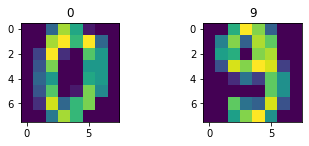

In [177]:
plt.figure(figsize=(6,4))
plt.subplot(2,2,1)
plt.imshow(digits.data[0,:].reshape(8,8));
plt.title(digits.target[0]);
plt.subplot(2,2,2)
plt.imshow(digits.data[455,:].reshape(8,8));
plt.title(digits.target[455]);

In [178]:
from sklearn.decomposition import PCA

In [179]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
projected_digits = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected_digits.shape)

(1797, 64)
(1797, 2)


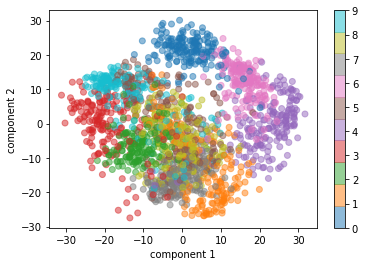

In [180]:
plt.scatter(projected_digits[:, 0], projected_digits[:, 1],
            c=digits.target, alpha=0.5, cmap="tab10")
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

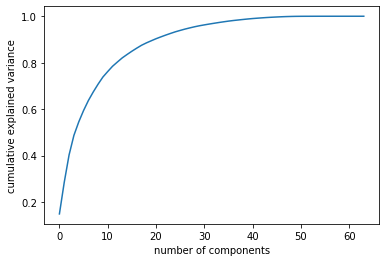

In [181]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Exercice

Use PCA to visualize the distribution of good and bad wines in 2 dimensions
1. Create a 2D projection of the wine data
2. plot the resulting projecting, color-coded according to label ("good" and "bad" wine) using `Set2` color palette
3. Plot the explained variance as a function of the number of components

## Clustering (unsupervised learning)

In [204]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [205]:
X = scale(digits.data)
y = digits.target

In [206]:
n_digits = len(np.unique(y))

In [207]:
kmeans = KMeans(n_clusters=n_digits)
kmeans.fit(X)

KMeans(n_clusters=10)

In [208]:
X_pca = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=n_digits)
kmeans.fit(X_pca)

KMeans(n_clusters=10)

In [209]:
plt.scatter?

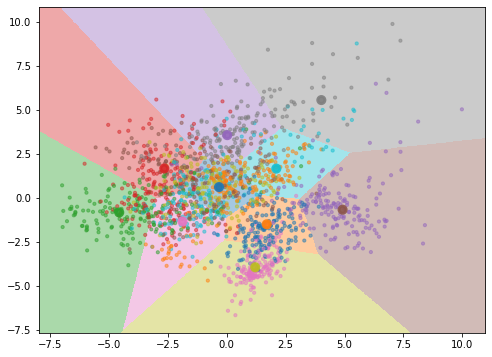

In [212]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='tab10', aspect='auto', origin='lower', alpha=0.4)

#plt.plot(X_pca[:, 0], X_pca[:, 1], 'w.', markersize=2)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap="tab10", s=10, alpha=0.5)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=50, alpha=0.9, 
            linewidths=3, zorder=10, c=np.unique(y), cmap="tab10");

In [213]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.37583911297456435
For n_clusters = 3 The average silhouette_score is : 0.39121684572547033
For n_clusters = 4 The average silhouette_score is : 0.3880597251154893
For n_clusters = 5 The average silhouette_score is : 0.37935472267555664
For n_clusters = 6 The average silhouette_score is : 0.39071018128481827
For n_clusters = 7 The average silhouette_score is : 0.38804305256611094
For n_clusters = 8 The average silhouette_score is : 0.3920098955960183
For n_clusters = 9 The average silhouette_score is : 0.374261220889874
For n_clusters = 10 The average silhouette_score is : 0.3759725573015173
For n_clusters = 11 The average silhouette_score is : 0.3690402452690687
For n_clusters = 12 The average silhouette_score is : 0.37426347543768745
For n_clusters = 13 The average silhouette_score is : 0.37640989227194227
For n_clusters = 14 The average silhouette_score is : 0.3652255163070289


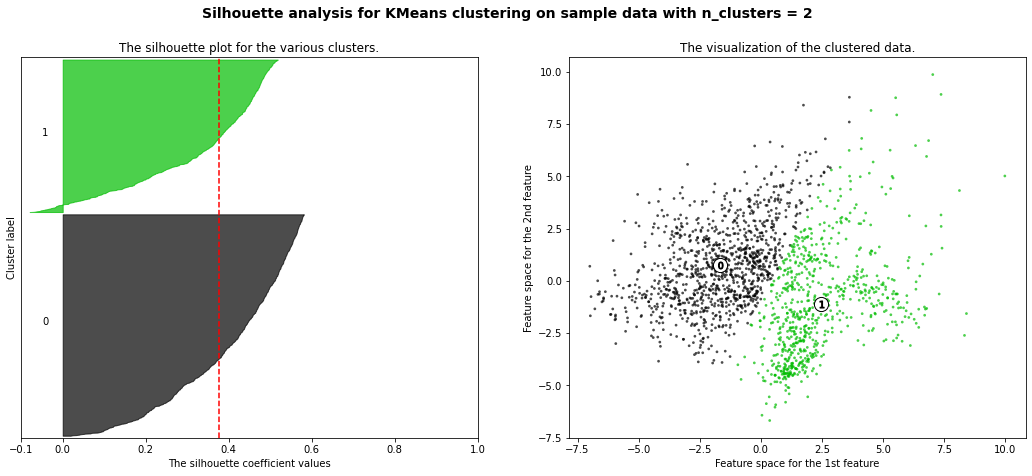

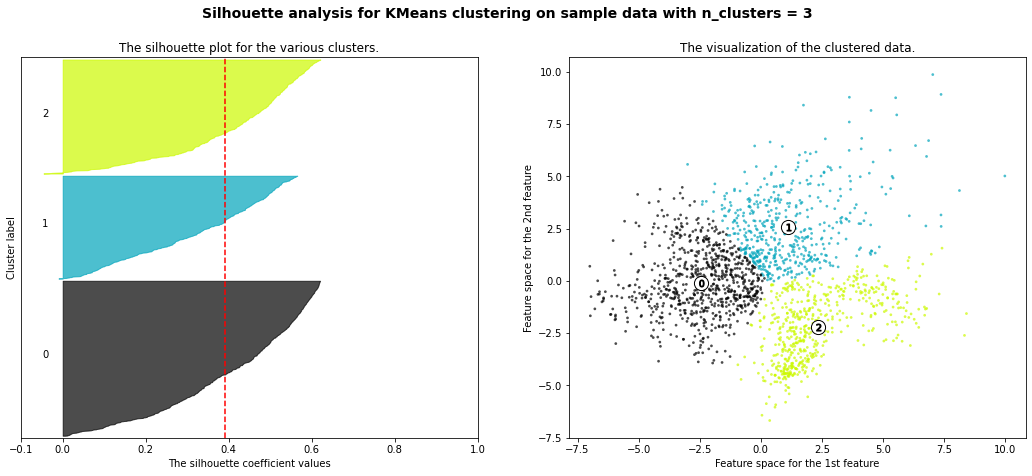

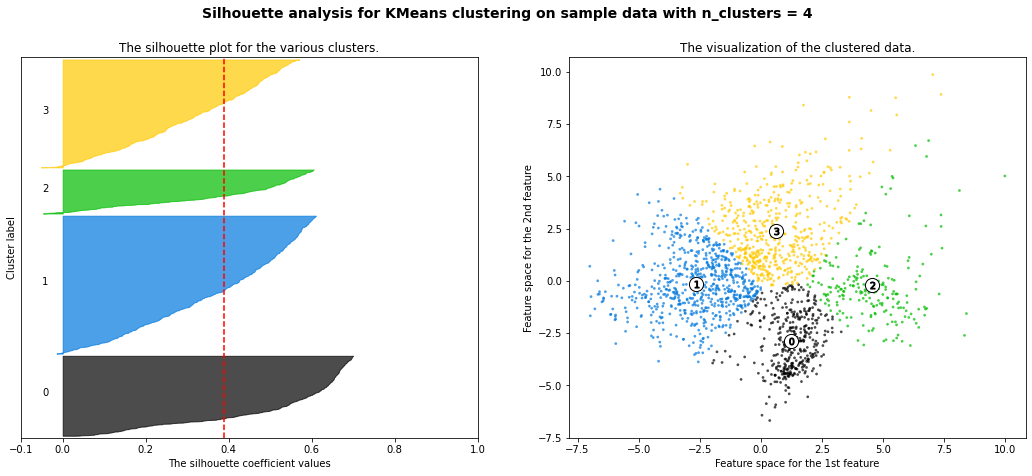

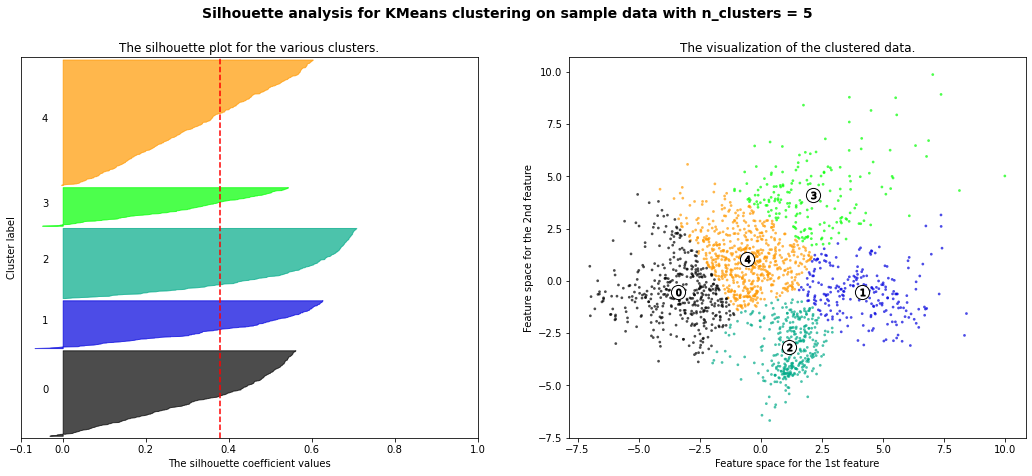

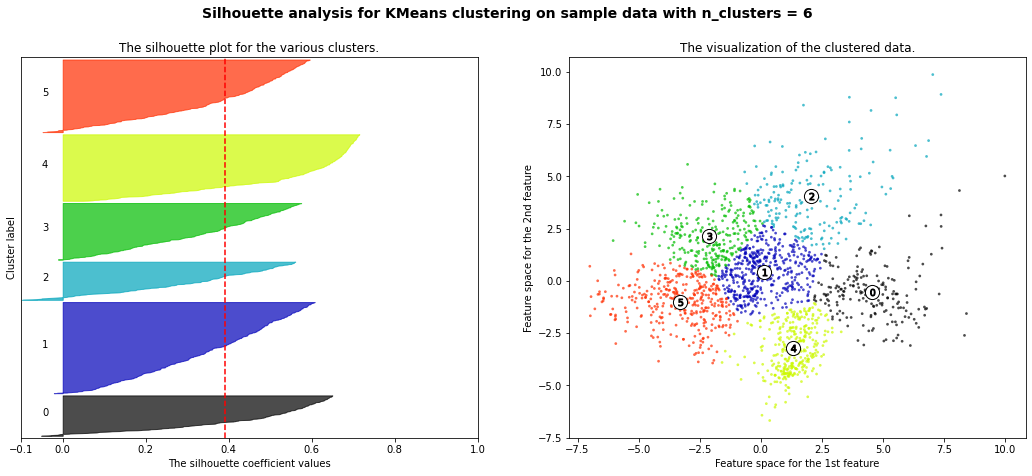

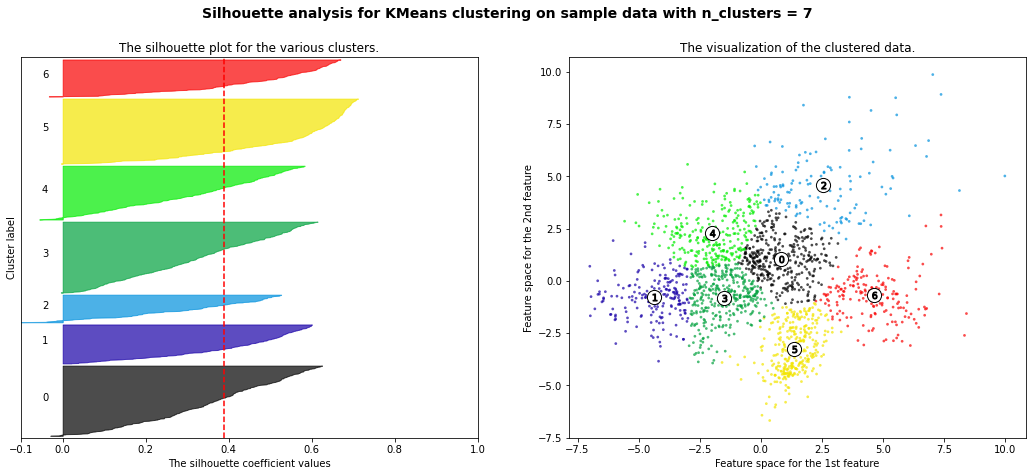

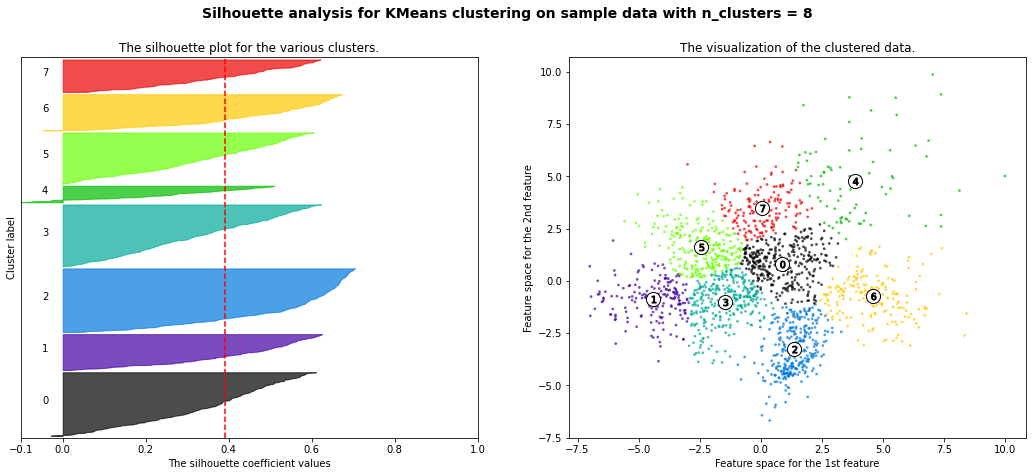

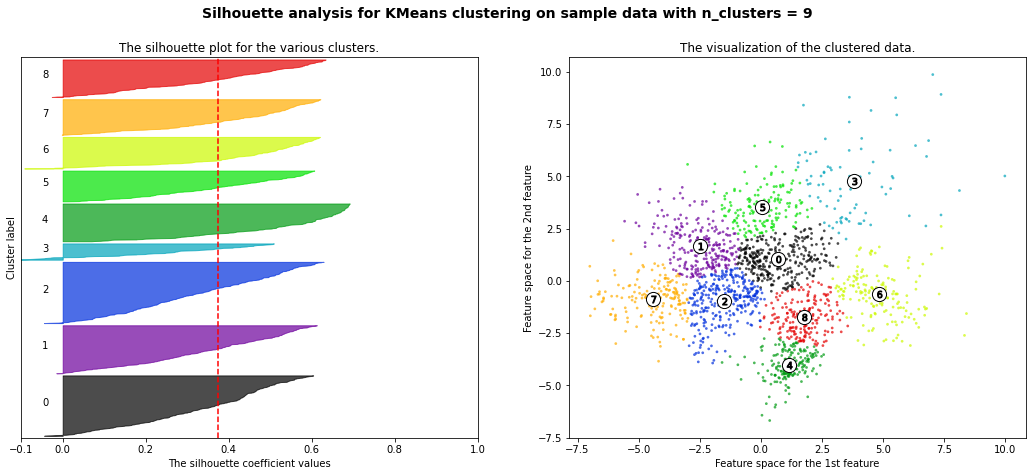

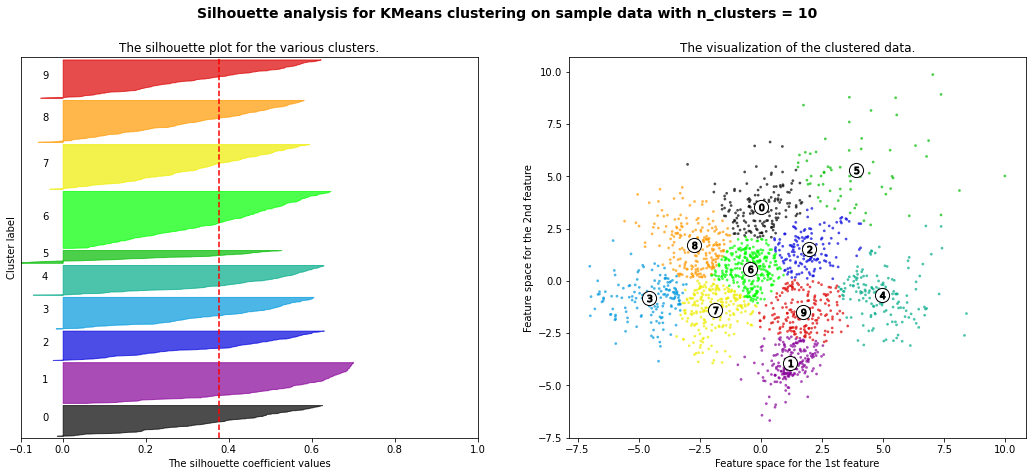

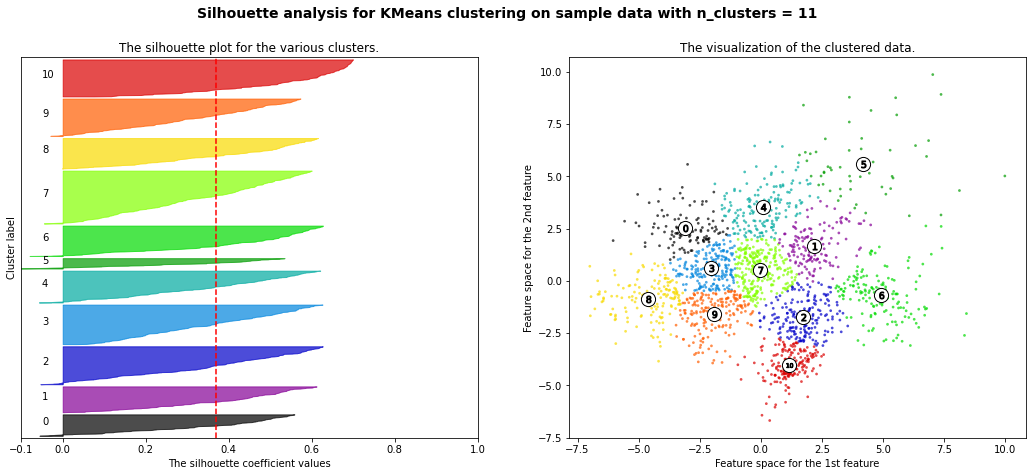

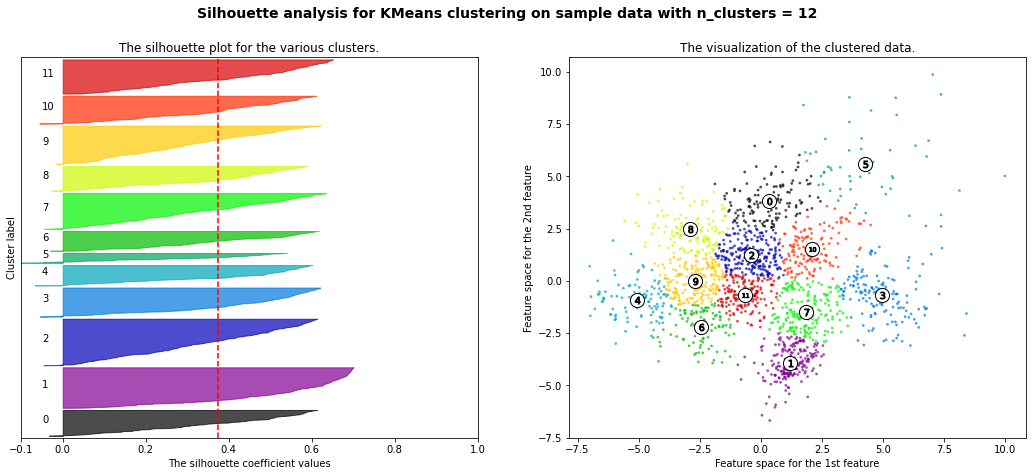

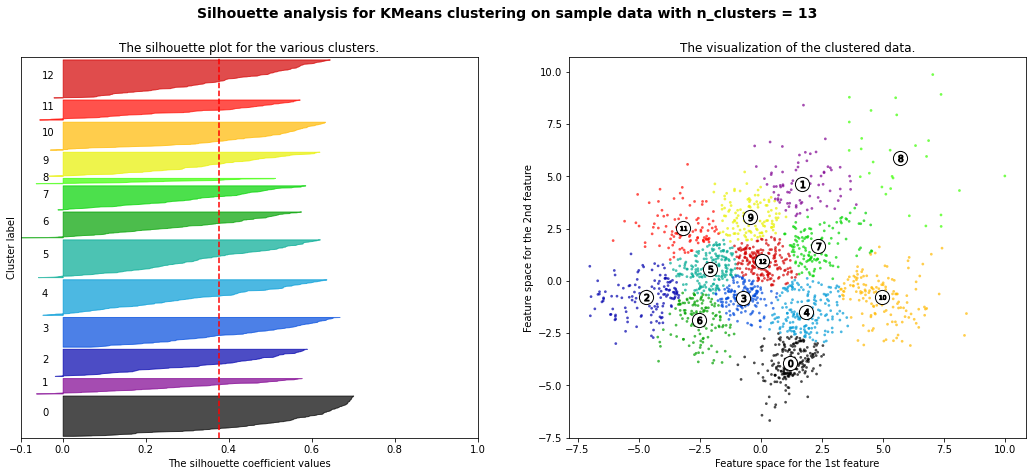

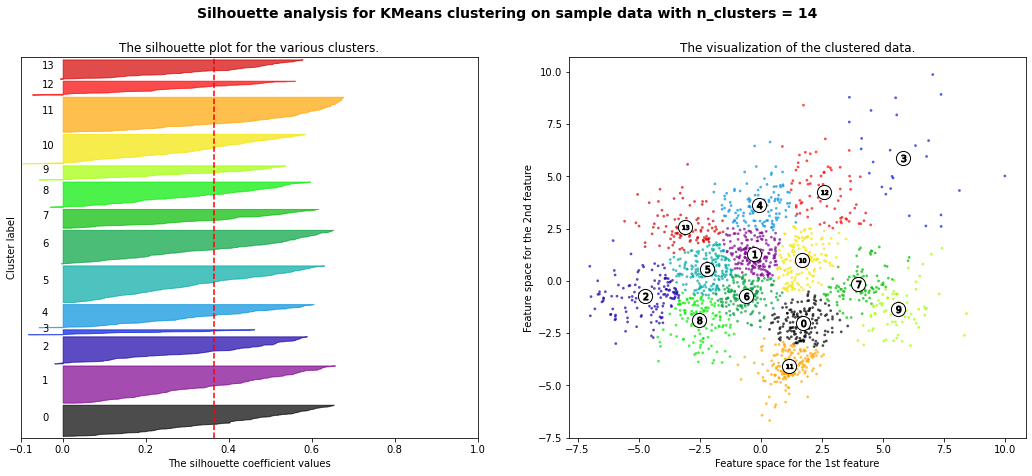

In [214]:
range_n_clusters = np.arange(2, 15)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')